# Yelp Process Finish

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd /content/drive/My\ Drive/COMP4641\ Project/data

/content/drive/My Drive/COMP4641 Project/data


In [0]:
%ls

allcities_business_mappedto_review.csv
all_cities_with_review_and_users.csv
all_cities_with_review_and_users.xlsx
arizona_restaurant_alllocation.csv
arizona_restaurant_combinedwithlocation.csv
arizona_restaurant_corTime.csv
arizona_restaurant_location1.csv
arizona_restaurant_location2.csv
arizona_restaurant_location3.csv
arizona_restaurant_location4.csv
arizona_restaurant_location5.csv
arizona_restaurants2.csv
arizona_restaurants.csv
arizona_restaurant_top5cities.csv
arizona_restaurant_withcheckin.csv
Location.ipynb
Scraper.py.ipynb
top5cities_restaurants_with_review.csv
top5_final_checkin.csv
top5_final_checkin_review_updated.csv
umango.csv


In [0]:
import pandas as pd
import numpy as np
import json

In [0]:
# Top 5 City Cleaner
removedf = pd.read_csv('arizona_restaurant_combinedwithlocation.csv')
removedf
cleandf = removedf.copy()
cleandf = cleandf.drop(['address','Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1','city', 'state', 'postal_code', 'latitude', 'longitude',],axis=1)

top5 = cleandf.processed_city.value_counts()[0:5] # top 5 cities
topn = cleandf.processed_city.value_counts()      # list of restaurants per neighbourhood
topn

Phoenix            3710
Scottsdale         1193
Maricopa County    1127
Mesa               1056
Tempe               896
Chandler            750
Gilbert             482
Peoria              333
Glendale            218
Surprise            198
Avondale             30
Buckeye              10
Name: processed_city, dtype: int64

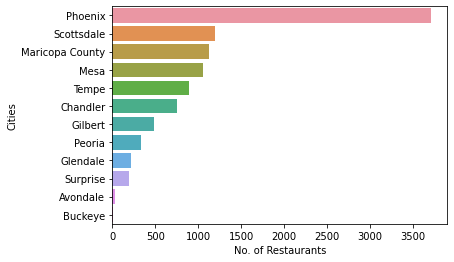

In [0]:
import matplotlib.pyplot as plt 
import seaborn as sns

topn_keys =  list(topn.keys())
topn_values =  list(topn.values)

words_df = pd.DataFrame({'word':topn_keys, 'count':topn_values})

d = words_df.nlargest(columns="count", n = 12) 
  
# visualize words and frequencies
plt.figure(figsize=(6,4)) 
ax = sns.barplot(data=d, x= "count", y = "word") 
ax.set(ylabel = 'Cities', xlabel='No. of Restaurants') 
plt.show()

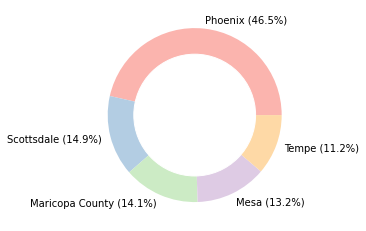

In [0]:
top5_keys =  list(top5.keys())
top5_values =  list(top5.values)

total = 0
for i in range(5):
  total += top5_values[i]

names=str(top5_keys[0])+ " (" + str("{0:.1f}".format(top5_values[0] * 100 / total)) + "%)", str(top5_keys[1])+ " (" + str("{0:.1f}".format(top5_values[1] * 100 / total)) + "%)",str(top5_keys[2])+ " (" + str("{0:.1f}".format(top5_values[2] * 100 / total)) + "%)",str(top5_keys[3])+ " (" + str("{0:.1f}".format(top5_values[3] * 100 / total)) + "%)",str(top5_keys[4])+ " (" + str("{0:.1f}".format(top5_values[4] * 100 / total)) + "%)"
size=[top5_values[0], top5_values[1],top5_values[2],top5_values[3],top5_values[4]]


# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

from palettable.colorbrewer.qualitative import Pastel1_7
plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


In [0]:
top5_city = list(top5.keys())
print(np.sum(list(top5.values)))
top5_city

7982


['Phoenix', 'Scottsdale', 'Maricopa County', 'Mesa', 'Tempe']

In [0]:
top5df = cleandf.copy()
top5df = top5df[(top5df['processed_city']).isin(top5_city)]

In [0]:
top5df = top5df.reset_index()

In [0]:
top5df = top5df.drop(['index'],axis=1)

In [0]:
len(top5df)

7982

In [0]:
#top5df.to_csv('arizona_restaurant_top5cities.csv',index=True,header=True)

# Separate dataframe by City

In [0]:
top5_city

['Phoenix', 'Scottsdale', 'Maricopa County', 'Mesa', 'Tempe']

In [0]:
phoenixdf = top5df[(top5df['processed_city']).isin(['Phoenix'])]
scottsdaledf = top5df[(top5df['processed_city']).isin(['Scottsdale'])]
maricopacountydf = top5df[(top5df['processed_city']).isin(['Maricopa County'])]
mesadf = top5df[(top5df['processed_city']).isin(['Mesa'])]
tempedf = top5df[(top5df['processed_city']).isin(['Tempe'])]

In [0]:
phoenixdf = phoenixdf.reset_index()
phoenixdf = phoenixdf.drop(['index'],axis=1)

scottsdaledf = scottsdaledf.reset_index()
scottsdaledf = scottsdaledf.drop(['index'],axis=1)

maricopacountydf = maricopacountydf.reset_index()
maricopacountydf = maricopacountydf.drop(['index'],axis=1)

mesadf = mesadf.reset_index()
mesadf = mesadf.drop(['index'],axis=1)

tempedf = tempedf.reset_index()
tempedf = tempedf.drop(['index'],axis=1)

In [0]:
# phoenixdf.to_csv('phoenix_restaurants.csv',index=True,header=True)
# scottsdaledf.to_csv('scottsdale_restaurants.csv',index=True,header=True)
# maricopacountydf.to_csv('maricopacounty_restaurants.csv',index=True,header=True)
# mesadf.to_csv('mesa_restaurants.csv',index=True,header=True)
# tempedf.to_csv('tempe_restaurants.csv',index=True,header=True)

## ======= Do NOT Run the following Code =======

In [0]:
with open('../review.json') as json_file:      
    data = json_file.readlines()
    data = list(map(json.loads, data)) 

reviewdf = pd.DataFrame(data)

## ======= Do NOT run the above Code =======

In [0]:
reviewdfcopy = reviewdf.copy()

In [0]:
business_to_review = pd.DataFrame()
business_to_review['business_id'] = top5df['business_id']
business_to_review

,business_id
0,1Dfx3zM-rW4n-31KeC8sJg
1,q2KtxnPa6rPSpAlMbg9l8g
2,44YFU284Z3KDEy25QyVoUw
3,ysfeDcLAYk_MVzfBmyiSTg
4,nsNONDHbV7Vudqh21uicqw
...,...
7977,3xI0ToitrAJkrUSH4gbmCA
7978,cILk7PnJBxNsMmGhQU2cyA
7979,mk_OXeS7_zcfYlaEEFYWvA
7980,I3dQmMkfqMsThMAuqIkooA


In [0]:
myDict = {}
for i in range(len(business_to_review)):
  myDict[business_to_review['business_id'][i]] = []
print(myDict)



{'1Dfx3zM-rW4n-31KeC8sJg': [], 'q2KtxnPa6rPSpAlMbg9l8g': [], '44YFU284Z3KDEy25QyVoUw': [], 'ysfeDcLAYk_MVzfBmyiSTg': [], 'nsNONDHbV7Vudqh21uicqw': [], 'MhnihE0alud0ereVInSt8Q': [], 'Sd75ucXKoZUM2BEfBHFUOg': [], 'dUffgo9Lh_Vk9TLuFR5ywg': [], 'c7JoAt6a3Ufkpn3TrGU23A': [], 'vg4ynLZ0yJ89pT4s_CEMzQ': [], 'e-9f6vasnWh3z0uOq287Aw': [], '8TBt9XAVZIZR2Y0EqBHskg': [], 'trMrmg0EKcxEYAkqLBbRMA': [], '6XImdD5qH_LFZhHeLjLaGQ': [], 'tylsscXmLq03-DzGI36bIA': [], 'zfOum9_rEhaLAqoAV3nYaQ': [], '3-aEgS7X2jrbxA7sA1nARw': [], 'd7iFE8GCz3S8eZGWEQoP6Q': [], 'QS3QxI7u5PRdtbGgI0-UsA': [], 'AMN3Sgns9tB2x-b3eWk0qQ': [], 'yGMCl0vYigshkXiZFIDTNw': [], 'rwscnQMpddjkVNaJQhNuHw': [], 'idF2DJg-WBk4eo2yY_7sHA': [], '221yaXPE1zmJqDvBVM__tw': [], '-bd4BQcl1ekgo7avaFngIw': [], 'ol2r325YnfuHcq7yeO3vdg': [], 'giCq1MmW-_S2tvNOAHvJcQ': [], 'QSGerT1enEKlvJnYkwthHQ': [], 'GvEjbCm5sNdLZ4fzJ9hvUQ': [], 'WZe-1SFcErsOT7gZY_x6wQ': [], 'qOuyItOatd-TF5kzhUlA9g': [], 'ncXQtqJT5Gk1QztwTrBrgw': [], 'aXsmmtepl0JZNcl3pkXqww': [], 'ZRdHKIji

In [0]:
for i in range(len(reviewdfcopy)):
  if(reviewdfcopy['business_id'][i] in myDict):
    myDict[reviewdfcopy['business_id'][i]].append(reviewdfcopy['text'][i])
#print(myDict)

In [0]:
business_to_review1 = business_to_review.copy()
business_to_review1

,business_id
0,1Dfx3zM-rW4n-31KeC8sJg
1,q2KtxnPa6rPSpAlMbg9l8g
2,44YFU284Z3KDEy25QyVoUw
3,ysfeDcLAYk_MVzfBmyiSTg
4,nsNONDHbV7Vudqh21uicqw
...,...
7977,3xI0ToitrAJkrUSH4gbmCA
7978,cILk7PnJBxNsMmGhQU2cyA
7979,mk_OXeS7_zcfYlaEEFYWvA
7980,I3dQmMkfqMsThMAuqIkooA


In [0]:
business_to_review1['reviews']=''
business_to_review1

,business_id,reviews
0,1Dfx3zM-rW4n-31KeC8sJg,
1,q2KtxnPa6rPSpAlMbg9l8g,
2,44YFU284Z3KDEy25QyVoUw,
3,ysfeDcLAYk_MVzfBmyiSTg,
4,nsNONDHbV7Vudqh21uicqw,
...,...,...
7977,3xI0ToitrAJkrUSH4gbmCA,
7978,cILk7PnJBxNsMmGhQU2cyA,
7979,mk_OXeS7_zcfYlaEEFYWvA,
7980,I3dQmMkfqMsThMAuqIkooA,


In [0]:
for i in range(len(business_to_review1)):
  business_to_review1['reviews'][i] = myDict[business_to_review1['business_id'][i]]

In [0]:
business_to_review2 = business_to_review1.copy()

In [0]:
business_to_review2 = business_to_review2[business_to_review2['reviews']!='']

In [0]:
len(business_to_review2)

7982

In [0]:
#business_to_review2.to_csv('allcities_business_mappedto_review.csv',header=True,index=True)

In [0]:
top5df_copy = top5df.copy()

In [0]:
len(top5df_copy)

7982

In [0]:
top5df_copy = top5df_copy.join(business_to_review2.set_index('business_id'),'business_id')

In [0]:
top5df_copy

,business_id,name,stars,review_count,is_open,attributes,categories,hours,date,processed_city,reviews
0,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...","['2014-02-15 04:00:43', '2014-02-15 05:10:03',...",Phoenix,"[I mean it's Taco Bell, so it is what it is. H..."
1,q2KtxnPa6rPSpAlMbg9l8g,Nothing Bundt Cakes,4.0,174,1,"{'BikeParking': 'True', 'BusinessParking': ""{'...","Desserts, Food, Cupcakes, Bakeries","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...","['2014-01-10 23:56:06', '2014-01-22 16:00:52',...",Scottsdale,"[I loved my little cake, but the owner is her ..."
2,44YFU284Z3KDEy25QyVoUw,Nee House Chinese Restaurant,3.5,269,1,"{'Caters': 'True', 'GoodForKids': 'True', 'Noi...","Chinese, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...","['2014-01-05 02:57:53', '2014-01-19 00:26:30',...",Phoenix,[Enjoyed Nee House immensely. No service issue...
3,ysfeDcLAYk_MVzfBmyiSTg,Vals Getaway DES Cafeteria,3.0,14,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Food, Cafes",NaN,"['2014-03-12 22:42:46', '2014-06-18 20:29:32',...",Phoenix,[The employees are nice and accommodating and ...
4,nsNONDHbV7Vudqh21uicqw,Salt Cellar,3.5,526,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Seafood, Restaurants","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...","['2014-01-12 05:24:43', '2014-01-20 00:59:21',...",Scottsdale,[Was very excited for happy hour and heard gre...
...,...,...,...,...,...,...,...,...,...,...,...
7977,3xI0ToitrAJkrUSH4gbmCA,Subway,2.0,14,1,"{'RestaurantsDelivery': 'False', 'GoodForKids'...","Restaurants, Sandwiches, Fast Food",NaN,"['2014-01-12 00:43:08', '2014-02-21 16:31:06',...",Phoenix,[The staff is attentive and the place is clean...
7978,cILk7PnJBxNsMmGhQU2cyA,Lola's,3.5,28,0,"{'HasTV': 'True', 'BusinessAcceptsCreditCards'...","Coffee & Tea, Restaurants, Food, Tapas Bars","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...","['2014-03-30 15:03:14', '2014-04-01 19:39:41',...",Phoenix,[I learned about something new today. I was at...
7979,mk_OXeS7_zcfYlaEEFYWvA,Safeway,3.5,23,1,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Grocery, Food","{'Monday': '5:0-0:0', 'Tuesday': '5:0-0:0', 'W...","['2014-01-01 16:36:11', '2014-01-03 17:52:17',...",Phoenix,"[Better selection than most, but annoying dela..."
7980,I3dQmMkfqMsThMAuqIkooA,Smashburger,3.0,151,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Salad, Restaurants, Hot Dogs, American (Tradit...","{'Monday': '10:0-21:30', 'Tuesday': '10:0-21:3...","['2014-01-09 01:04:39', '2014-01-09 01:04:59',...",Mesa,"[Good Food, but Disgusting Environment. My fam..."


In [0]:
#top5df_copy.to_csv('top5cities_restaurants_with_review.csv',header=True,index=True)


# User.json

In [0]:
with open('../user.json') as json_file:      
    data = json_file.readlines()
    data = list(map(json.loads, data)) 

userdf = pd.DataFrame(data)

In [0]:
userdf2 = userdf.copy()

In [0]:
userdf2.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [0]:
userdf2 = userdf2.drop(['name', 'yelping_since','friends','useful', 'funny',
       'cool', 'elite', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],axis=1)

In [0]:
reviewdfcopy1 = reviewdf.copy()

In [0]:
reviewdfcopy1 = reviewdfcopy1.join(userdf2.set_index('user_id'),'user_id')

In [0]:
reviewdfcopy1 = reviewdfcopy1.drop(['review_id','review_count','user_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'], axis=1)

In [0]:
top5df_copy1 =top5df_copy.copy()

In [0]:
reviewdfcopy1.columns

Index(['business_id', 'fans', 'average_stars'], dtype='object')

In [0]:
fans = {}
avg_stars = {}

top5df_copy1['user_stars'] = ''
top5df_copy1['user_fans'] = ''
for i in range(len(top5df_copy1)):
  fans[top5df_copy1['business_id'][i]] = []
  avg_stars[top5df_copy1['business_id'][i]] = []
#print(myDict)

In [0]:
for i in range(len(reviewdfcopy1)):
  if(reviewdfcopy1['business_id'][i] in fans):
    fans[reviewdfcopy1['business_id'][i]].append(reviewdfcopy1['fans'][i])
  if(reviewdfcopy1['business_id'][i] in avg_stars):
    avg_stars[reviewdfcopy1['business_id'][i]].append(reviewdfcopy1['average_stars'][i])

In [0]:
for i in range(len(top5df_copy1)):
  top5df_copy1['user_stars'][i] = avg_stars[top5df_copy1['business_id'][i]]
  top5df_copy1['user_fans'][i] = fans[top5df_copy1['business_id'][i]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
top5df_copy1

,business_id,name,stars,review_count,is_open,attributes,categories,hours,date,processed_city,reviews,user_stars,user_fans
0,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...","['2014-02-15 04:00:43', '2014-02-15 05:10:03',...",Phoenix,"[I mean it's Taco Bell, so it is what it is. H...","[3.76, 2.55, 3.68, 3.17, 3.68, 3.68, 2.31, 3.6...","[0, 5, 29, 0, 2, 0, 0, 92, 26, 0, 3, 0, 17, 17..."
1,q2KtxnPa6rPSpAlMbg9l8g,Nothing Bundt Cakes,4.0,174,1,"{'BikeParking': 'True', 'BusinessParking': ""{'...","Desserts, Food, Cupcakes, Bakeries","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...","['2014-01-10 23:56:06', '2014-01-22 16:00:52',...",Scottsdale,"[I loved my little cake, but the owner is her ...","[3.82, 3.55, 4.13, 5.0, 3.63, 5.0, 4.11, 4.75,...","[4, 1, 18, 0, 0, 0, 35, 0, 1, 43, 0, 10, 2, 7,..."
2,44YFU284Z3KDEy25QyVoUw,Nee House Chinese Restaurant,3.5,269,1,"{'Caters': 'True', 'GoodForKids': 'True', 'Noi...","Chinese, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...","['2014-01-05 02:57:53', '2014-01-19 00:26:30',...",Phoenix,[Enjoyed Nee House immensely. No service issue...,"[4.7, 4.25, 3.93, 4.07, 3.57, 3.33, 4.13, 3.5,...","[0, 0, 111, 10, 4, 5, 0, 0, 11, 5, 3, 1, 1, 1,..."
3,ysfeDcLAYk_MVzfBmyiSTg,Vals Getaway DES Cafeteria,3.0,14,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Food, Cafes",NaN,"['2014-03-12 22:42:46', '2014-06-18 20:29:32',...",Phoenix,[The employees are nice and accommodating and ...,"[3.25, 2.75, 2.63, 4.18, 4.15, 4.41, 3.82, 4.5...","[0, 2, 9, 0, 0, 2, 0, 0, 9, 9, 0, 5, 2, 0]"
4,nsNONDHbV7Vudqh21uicqw,Salt Cellar,3.5,526,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Seafood, Restaurants","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...","['2014-01-12 05:24:43', '2014-01-20 00:59:21',...",Scottsdale,[Was very excited for happy hour and heard gre...,"[1.5, 3.7, 1.0, 2.17, 3.76, 3.33, 4.0, 3.37, 4...","[0, 4, 0, 0, 1, 0, 1, 0, 3, 30, 0, 0, 2, 0, 0,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7977,3xI0ToitrAJkrUSH4gbmCA,Subway,2.0,14,1,"{'RestaurantsDelivery': 'False', 'GoodForKids'...","Restaurants, Sandwiches, Fast Food",NaN,"['2014-01-12 00:43:08', '2014-02-21 16:31:06',...",Phoenix,[The staff is attentive and the place is clean...,"[4.62, 4.57, 4.62, 2.76, 3.02, 1.0, 2.24, 3.96...","[0, 1, 5, 1, 7, 0, 0, 2, 0, 0, 0, 0, 0, 0]"
7978,cILk7PnJBxNsMmGhQU2cyA,Lola's,3.5,28,0,"{'HasTV': 'True', 'BusinessAcceptsCreditCards'...","Coffee & Tea, Restaurants, Food, Tapas Bars","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...","['2014-03-30 15:03:14', '2014-04-01 19:39:41',...",Phoenix,[I learned about something new today. I was at...,"[3.88, 4.04, 2.0, 4.04, 4.22, 2.75, 3.68, 3.63...","[0, 2, 0, 38, 0, 2, 1, 7, 0, 1, 4, 0, 1, 44, 2..."
7979,mk_OXeS7_zcfYlaEEFYWvA,Safeway,3.5,23,1,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Grocery, Food","{'Monday': '5:0-0:0', 'Tuesday': '5:0-0:0', 'W...","['2014-01-01 16:36:11', '2014-01-03 17:52:17',...",Phoenix,"[Better selection than most, but annoying dela...","[2.69, 3.97, 2.87, 3.72, 3.48, 4.25, 3.92, 4.8...","[0, 33, 4, 1, 21, 0, 22, 8, 2, 4, 0, 23, 23, 8..."
7980,I3dQmMkfqMsThMAuqIkooA,Smashburger,3.0,151,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Salad, Restaurants, Hot Dogs, American (Tradit...","{'Monday': '10:0-21:30', 'Tuesday': '10:0-21:3...","['2014-01-09 01:04:39', '2014-01-09 01:04:59',...",Mesa,"[Good Food, but Disgusting Environment. My fam...","[3.71, 3.3, 3.54, 2.6, 3.0, 3.32, 4.29, 3.26, ...","[0, 0, 3, 0, 0, 0, 0, 2, 1, 0, 1, 5, 2, 0, 1, ..."


In [0]:
top5df_copy1.to_csv('all_cities_with_review_and_users.csv',index=True,header=True)